# Data Science Project Planning: Predicting Newsletter Subscription in Minecraft Players

## Introduction
This report explores a dataset from a UBC research group studying player behavior in a Minecraft server. The goal is to predict which types of players are most likely to subscribe to a game-related newsletter based on their characteristics and playing patterns.

In [1]:
library(tidyverse)
library(repr)

options(repr.plot.width = 10, repr.plot.height = 6)

options(warn = -1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv('https://raw.githubusercontent.com/mohammadrezaebrahimi/Project_Planning_Stage_Individual-final/refs/heads/main/players.csv')
sessions <- read_csv('https://raw.githubusercontent.com/mohammadrezaebrahimi/Project_Planning_Stage_Individual-final/refs/heads/main/sessions.csv')

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1. Data Description

### Datasets Overview
This project uses two datasets collected from a Minecraft research server operated by the PLAI group at UBC:

**Dataset 1: players.csv**
- Contains information about individual players who have joined the server
- Each row represents one unique player

**Dataset 2: sessions.csv**
- Contains information about individual play sessions
- Each row represents one gaming session by a player
- Players can have multiple sessions

In [4]:
paste("PLAYERS DATASET - Number of observations:", nrow(players))
paste("PLAYERS DATASET - Number of variables:", ncol(players))

paste("SESSIONS DATASET - Number of observations:", nrow(sessions))
paste("SESSIONS DATASET - Number of variables:", ncol(sessions))

[1] "PLAYERS DATASET - Number of observations: 196"

[1] "PLAYERS DATASET - Number of variables: 7"

[1] "SESSIONS DATASET - Number of observations: 1535"

[1] "SESSIONS DATASET - Number of variables: 5"

In [5]:
players_vars <- tibble(
    `Variable Name` = c('experience', 'subscribe', 'hashedEmail', 'played_hours', 'name', 'gender', 'Age'),
    Type = c('Categorical', 'Boolean', 'Text', 'Numeric', 'Text', 'Categorical', 'Numeric'),
    Description = c(
        'Player gaming experience level (Beginner, Amateur, Regular, Veteran, Pro)',
        'Whether player subscribed to newsletter (TRUE/FALSE)',
        'Anonymized unique identifier for each player',
        'Total hours played on the server',
        'Player username',
        'Self-reported gender identity',
        'Player age in years'
    )
)

players_vars

Variable Name,Type,Description
<chr>,<chr>,<chr>
experience,Categorical,"Player gaming experience level (Beginner, Amateur, Regular, Veteran, Pro)"
subscribe,Boolean,Whether player subscribed to newsletter (TRUE/FALSE)
hashedEmail,Text,Anonymized unique identifier for each player
played_hours,Numeric,Total hours played on the server
name,Text,Player username
gender,Categorical,Self-reported gender identity
Age,Numeric,Player age in years


In [6]:
sessions_vars <- tibble(
    `Variable Name` = c('hashedEmail', 'start_time', 'end_time', 'original_start_time', 'original_end_time'),
    Type = c('Text', 'DateTime', 'DateTime', 'Numeric', 'Numeric'),
    Description = c(
        'Anonymized player identifier (links to players.csv)',
        'Session start date and time (formatted)',
        'Session end date and time (formatted)',
        'Session start timestamp (Unix epoch)',
        'Session end timestamp (Unix epoch)'
    )
)

sessions_vars

Variable Name,Type,Description
<chr>,<chr>,<chr>
hashedEmail,Text,Anonymized player identifier (links to players.csv)
start_time,DateTime,Session start date and time (formatted)
end_time,DateTime,Session end date and time (formatted)
original_start_time,Numeric,Session start timestamp (Unix epoch)
original_end_time,Numeric,Session end timestamp (Unix epoch)


In [7]:
players |>
    select(played_hours, Age) |>
    summary()

  played_hours          Age       
 Min.   :  0.000   Min.   : 9.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :21.14  
 3rd Qu.:  0.600   3rd Qu.:22.75  
 Max.   :223.100   Max.   :58.00  
                   NA's   :2      

In [8]:
table(players |> pull(experience))


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

In [9]:
table(players |> pull(subscribe))


FALSE  TRUE 
   52   144 

In [10]:
table(players |> pull(gender))


          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 

In [11]:
tibble(
    Variable = c('played_hours', 'Age'),
    Mean = c(
        round(players |> pull(played_hours) |> mean(na.rm = TRUE), 2),
        round(players |> pull(Age) |> mean(na.rm = TRUE), 2)
    )
)

Variable,Mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


### Data Quality Observations

**Issues Identified:**
- Missing age values for two players and missing end times for two sessions
- Many players with zero hours played but subscribed (may indicate early sign-ups)
- Potential gender data inconsistencies

**Data Collection:**
Data was collected automatically from the Minecraft server, with player characteristics self-reported during registration.

## 2. Research Questions

### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?

### Specific Question
Can player experience level, age, gender, and hours played predict whether a player will subscribe to the game newsletter?

### How the Data Addresses the Question
The players.csv dataset contains the response variable `subscribe` (TRUE/FALSE) and explanatory variables including `experience`, `Age`, `gender`, and `played_hours`, enabling us to build a classification model predicting subscription status.

## 3. Exploratory Data Analysis and Visualization

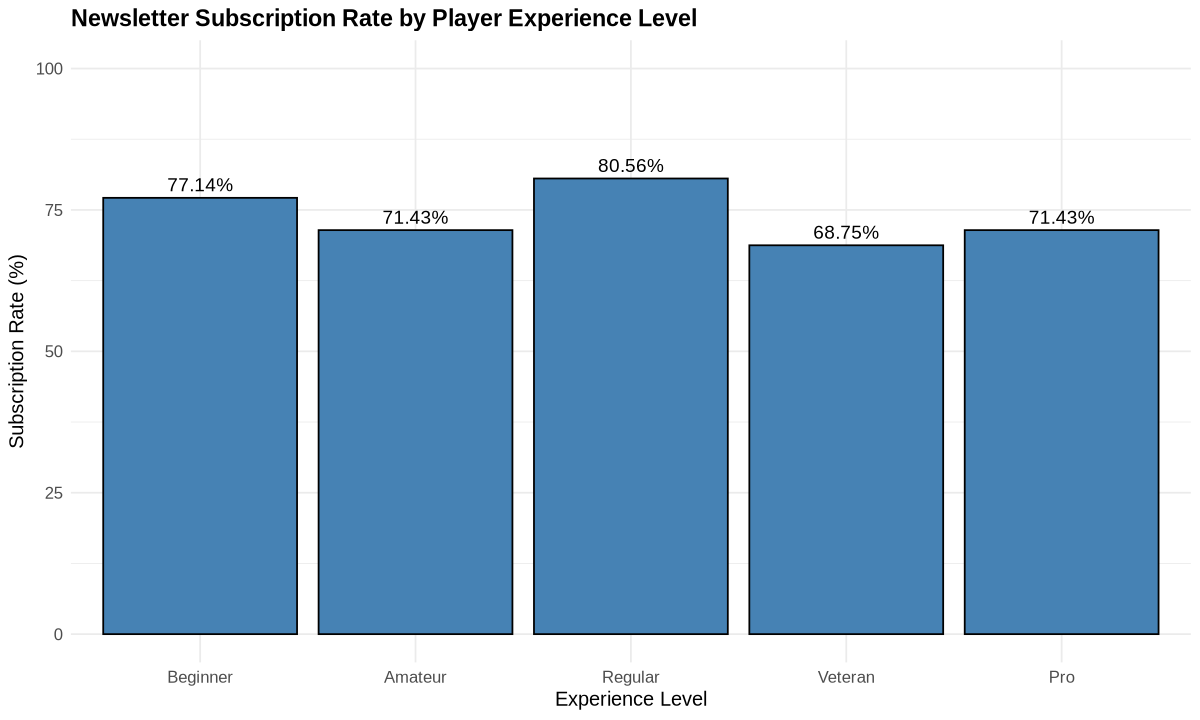

In [13]:
exp_subscribe <- players |>
    group_by(experience) |>
    summarise(subscription_rate = round(mean(subscribe) * 100, 2), .groups = 'drop') |>
    mutate(experience = factor(experience, 
                               levels = c('Beginner', 'Amateur', 'Regular', 'Veteran', 'Pro'))) |>
    arrange(experience)

ggplot(exp_subscribe, aes(x = experience, y = subscription_rate)) +
    geom_bar(stat = 'identity', fill = 'steelblue', color = 'black') +
    geom_text(aes(label = paste0(subscription_rate, '%')), vjust = -0.5, size = 4) +
    labs(
        title = 'Newsletter Subscription Rate by Player Experience Level',
        x = 'Experience Level',
        y = 'Subscription Rate (%)'
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = 'bold', size = 14),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)
    ) +
    ylim(0, 100)

This visualization shows how subscription rates vary across different experience levels. We can see if more experienced or novice players are more likely to subscribe to the newsletter.

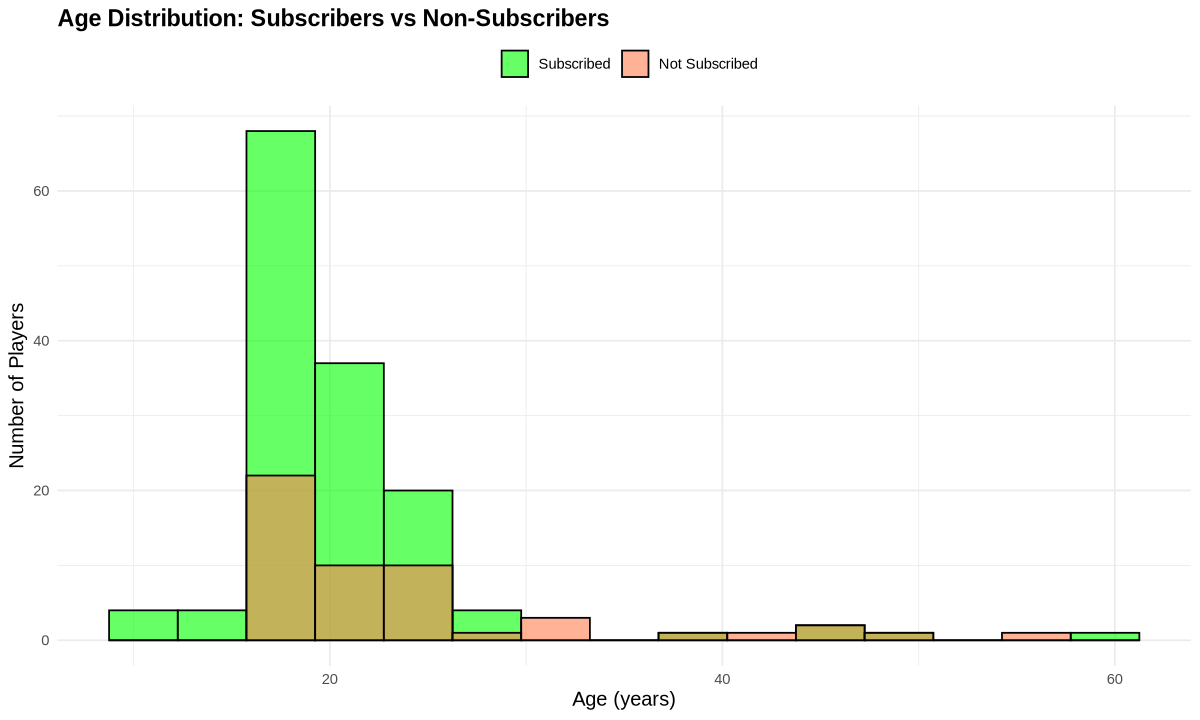

In [14]:
players_ordered <- players |>
    mutate(subscribe = factor(subscribe, levels = c('TRUE', 'FALSE')))

ggplot(players_ordered, aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 15, alpha = 0.6, color = 'black', position = 'identity') +
    scale_fill_manual(values = c('TRUE' = 'green', 'FALSE' = 'coral'),
                      labels = c('TRUE' = 'Subscribed', 'FALSE' = 'Not Subscribed'),
                      name = '') +
    labs(
        title = 'Age Distribution: Subscribers vs Non-Subscribers',
        x = 'Age (years)',
        y = 'Number of Players'
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = 'bold', size = 14),
        axis.title = element_text(size = 12),
        legend.position = 'top'
    )

This visualization compares the age distributions of players who subscribed versus those who didn't, helping identify if certain age groups are more likely to subscribe.

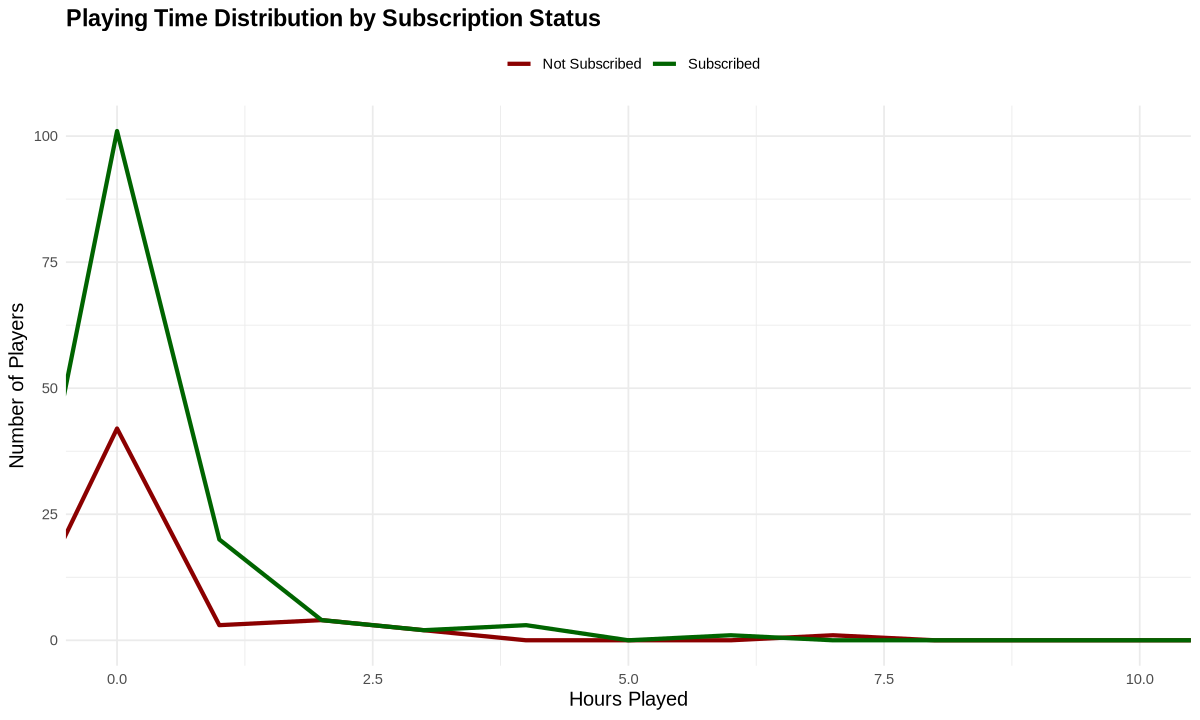

In [15]:
players_plot <- players |>
    mutate(subscribe_label = ifelse(subscribe, 'Subscribed', 'Not Subscribed'))

ggplot(players_plot, aes(x = played_hours, color = subscribe_label)) +
    geom_freqpoly(binwidth = 1, size = 1.2) +
    scale_color_manual(values = c('Subscribed' = 'darkgreen', 'Not Subscribed' = 'darkred')) +
    coord_cartesian(xlim = c(0, 10)) +
    labs(
        title = 'Playing Time Distribution by Subscription Status',
        x = 'Hours Played',
        y = 'Number of Players',
        color = ''
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = 'bold', size = 14),
        axis.title = element_text(size = 12),
        legend.position = 'top'
    )

This line graph shows how many players fall into each playing time category. We can compare the patterns between subscribers and non-subscribers.

In [16]:
players |>
    summarise(across(everything(), ~sum(is.na(.))))

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


In [17]:
sessions |>
    summarise(across(everything(), ~sum(is.na(.))))

hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


In [18]:
players |>
    mutate(subscribe_numeric = as.numeric(subscribe)) |>
    select(played_hours, Age, subscribe_numeric) |>
    cor(use = "complete.obs") |>
    round(2)

,played_hours,Age,subscribe_numeric
played_hours,1.00,-0.06,0.12
Age,-0.06,1.00,-0.21
subscribe_numeric,0.12,-0.21,1.00
